In [1]:
import pandas as pd
import numpy as np
import copy
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [17]:
train = pd.read_csv('./ECG5000/ECG5000_TRAIN.txt', sep= '  ', header=None)
test = pd.read_csv('./ECG5000/ECG5000_TEST.txt', sep= '  ', header=None)

C:\Users\deepdesk\AppData\Local\Temp\ipykernel_13924\307898977.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train = pd.read_csv('./ECG5000/ECG5000_TRAIN.txt', sep= '  ', header=None)
C:\Users\deepdesk\AppData\Local\Temp\ipykernel_13924\307898977.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv('./ECG5000/ECG5000_TEST.txt', sep= '  ', header=None)


In [18]:
train.shape, test.shape

((500, 141), (4500, 141))

In [22]:
df = pd.concat([train,test])

In [23]:
df.shape

(5000, 141)

Column 0  : class 1 : Normal, Rest : Irregular

In [24]:
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,4.0,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4496,2.0,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932
4497,2.0,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.622720,-2.044092,-1.295874,...,-0.896575,-1.512234,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531
4498,2.0,-1.124432,-1.905039,-2.192707,-2.904320,-2.900722,-2.761252,-2.569705,-2.043893,-1.490538,...,-2.495989,-2.821782,-3.268355,-3.634981,-3.168765,-2.245878,-1.262260,-0.443307,-0.559769,0.108568


In [25]:
df = df.add_prefix('c') #to allow slicing dicing operations on columns

In [26]:
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [27]:
df['c0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [28]:
df.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,...,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,...,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,...,-0.655753,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692
50%,1.000000,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588
75%,2.000000,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,...,1.062134,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012
max,5.000000,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


He's using the labels in train split

In [29]:
train_data, test_data, train_labels, test_labels = train_test_split(df.values,df.values[:,0:1], test_size = 0.2, random_state=111)

In [34]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)

In [39]:
train_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)

In [41]:
normal_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0==0').values[:,1:]
# pd.Dataframe will use numeric names for cols so used add_prefix. Query allows us to filter through the values of the dataframe
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [42]:
normal_test_data= pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

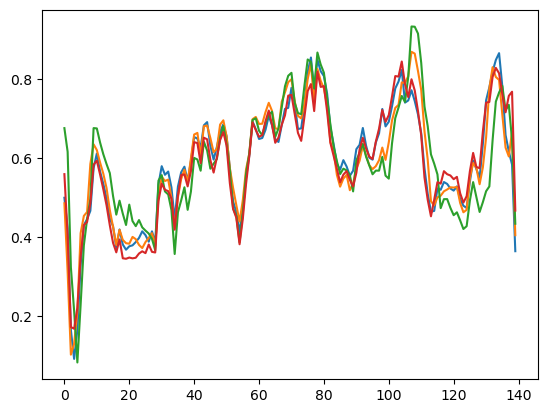

In [44]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])



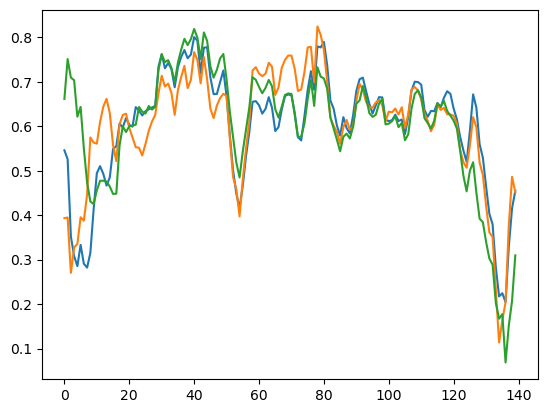

In [46]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

We'll train a model using normal data and use anomalous data during inference using the reconstruction error

Autoencoder Model 1

In [47]:
# model subclassing
class AutoEncoder(Model):
  def __init__(self,activation='relu'):
# In this code, AutoEncoder is a subclass of the Model class from the TensorFlow Keras API. When defining a subclass of a Python class, it is necessary to call the constructor of the parent class in order to initialize any inherited attributes or methods.
# The super() function is used to call the constructor of the parent class. In this case, it calls the constructor of the Model class to initialize the AutoEncoder object as a Keras model.
# Even though Model is not explicitly defined in the code, it is inherited by the AutoEncoder class, as it is defined in the TensorFlow Keras API. By calling super(AutoEncoder, self).__init__(), the constructor of the parent class (Model) is called, which initializes the necessary attributes for AutoEncoder to function as a Keras model.
    super(AutoEncoder, self).__init__()  #not required but ensures that the AutoEncoder class is properly initialized as a Keras model, and it is compatible with other Keras models and tools.   
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(64, activation=activation),
      tf.keras.layers.Dense(32, activation=activation),
      tf.keras.layers.Dense(16, activation=activation),
      tf.keras.layers.Dense(8, activation=activation)])
    
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation=activation),
      tf.keras.layers.Dense(32, activation=activation),
      tf.keras.layers.Dense(64, activation=activation),
      tf.keras.layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)  #compresses the data
    decoded = self.decoder(encoded) #reconstructs the original data 
    return decoded

In [48]:
model= AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',     #stop if val_loss does not improve for more than 2 epochs
                                                    patience=2,
                                                    mode='min')  #check for min of val_loss, if accuracy then it should be max, 'auto' does it automatically

model.compile(optimizer='adam', loss='mae')  

In [50]:
history = model.fit(normal_train_data, normal_train_data, #passing something as y, preferrably the same data, since this is an unsupervised algo.
          epochs=50, 
          batch_size=128,
          validation_data=(train_data_scaled[:,1:], train_data_scaled[:,1:]), #passing combined data, to make model train harder, as per author.
          shuffle=True,
        #  We can and probably should use normal data only, for val, since we are fitting the model to be compress and decompress normal data, as well as detect abnormal data if reconstruction error is high
          callbacks=[early_stopping])

Epoch 1/50
19/19 [==============================] - 4s 28ms/step - loss: 0.1311 - val_loss: 0.1166
Epoch 2/50
19/19 [==============================] - 0s 14ms/step - loss: 0.0879 - val_loss: 0.0868
Epoch 3/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0589 - val_loss: 0.0782
Epoch 4/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0499 - val_loss: 0.0760
Epoch 5/50
19/19 [==============================] - 0s 15ms/step - loss: 0.0480 - val_loss: 0.0752
Epoch 6/50
19/19 [==============================] - 0s 14ms/step - loss: 0.0476 - val_loss: 0.0750
Epoch 7/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0474 - val_loss: 0.0741
Epoch 8/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0471 - val_loss: 0.0737
Epoch 9/50
19/19 [==============================] - 0s 14ms/step - loss: 0.0467 - val_loss: 0.0730
Epoch 10/50
19/19 [==============================] - 0s 14ms/step - loss: 0.0458 - val_loss: 0.0718
Epoch 11/

In [52]:
encoder_out = model.encoder(normal_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [53]:
encoder_out.shape,decoder_out.shape

((563, 8), (563, 140))

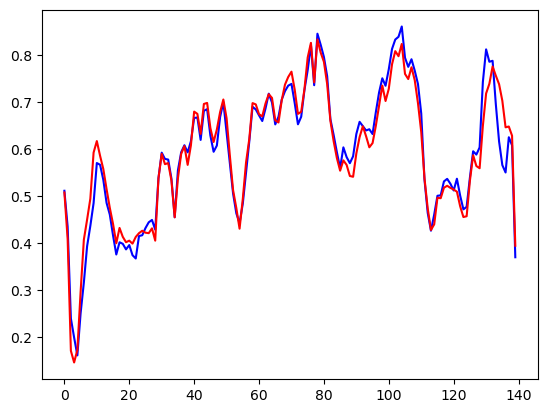

In [54]:
plt.plot(normal_test_data[0],'b')
plt.plot(decoder_out[0],'r')

In [55]:
encoder_out_a = model.encoder(anomaly_test_data).numpy()
decoder_out_a = model.decoder(encoder_out_a).numpy()

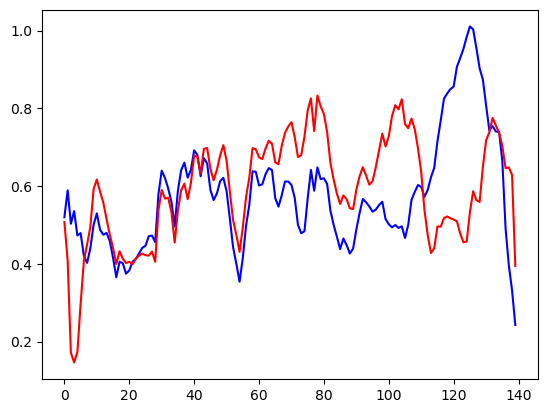

In [56]:
plt.plot(anomaly_test_data[0],'b')
plt.plot(decoder_out[0],'r')

In [57]:
tf.keras.losses.mae(decoder_out[0], normal_test_data[0])

<tf.Tensor: shape=(), dtype=float64, numpy=0.02360893874632559>

In [58]:
tf.keras.losses.mae(decoder_out[0], anomaly_test_data[0])

<tf.Tensor: shape=(), dtype=float64, numpy=0.13260587482021968>

18/18 [==============================] - 0s 3ms/step


(array([ 6., 12., 26., 34., 58., 46., 47., 48., 34., 35., 21., 23., 17.,
        18., 22., 14., 13.,  7.,  6.,  8., 10.,  7.,  4.,  5.,  7.,  5.,
         4.,  6.,  1.,  0.,  3.,  0.,  1.,  1.,  6.,  0.,  0.,  1.,  1.,
         0.,  2.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([0.0114653 , 0.01348443, 0.01550357, 0.0175227 , 0.01954184,
        0.02156097, 0.02358011, 0.02559924, 0.02761837, 0.02963751,
        0.03165664, 0.03367578, 0.03569491, 0.03771405, 0.03973318,
        0.04175231, 0.04377145, 0.04579058, 0.04780972, 0.04982885,
        0.05184799, 0.05386712, 0.05588625, 0.05790539, 0.05992452,
        0.06194366, 0.06396279, 0.06598193, 0.06800106, 0.0700202 ,
        0.07203933, 0.07405846, 0.0760776 , 0.07809673, 0.08011587,
        0.082135  , 0.08415414, 0.08617327, 0.0881924 , 0.09021154,
        0.09223067, 0.09424981, 0.09626894, 0.09828808, 0.10030721,
        0.10232634, 0.10434548, 0.10636461, 0.10838375, 0.11040288,
        0.11242202]),
 <BarContainer

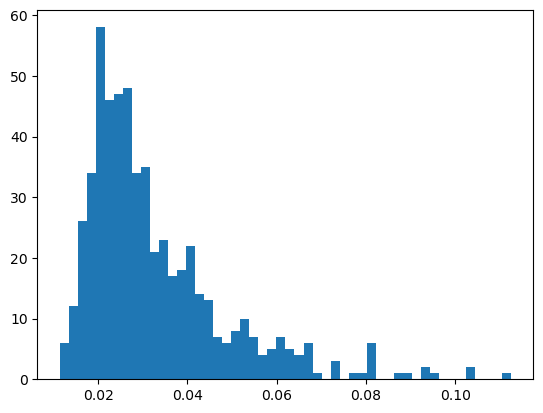

In [59]:
reconstructions = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data)
plt.hist(train_loss, bins=50)

In [60]:
threshold = np.mean(train_loss) + 2.1*np.std(train_loss)

14/14 [==============================] - 0s 3ms/step


(array([ 1.,  0.,  1.,  0.,  2.,  3.,  0.,  1.,  4.,  5.,  9., 21., 26.,
        31., 56., 42., 51., 52., 36., 27., 29., 17.,  5.,  2.,  0.,  0.,
         1.,  2.,  1.,  3.,  1.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.04807983, 0.05091131, 0.05374279, 0.05657426, 0.05940574,
        0.06223722, 0.0650687 , 0.06790017, 0.07073165, 0.07356313,
        0.07639461, 0.07922609, 0.08205756, 0.08488904, 0.08772052,
        0.090552  , 0.09338347, 0.09621495, 0.09904643, 0.10187791,
        0.10470939, 0.10754086, 0.11037234, 0.11320382, 0.1160353 ,
        0.11886677, 0.12169825, 0.12452973, 0.12736121, 0.13019268,
        0.13302416, 0.13585564, 0.13868712, 0.1415186 , 0.14435007,
        0.14718155, 0.15001303, 0.15284451, 0.15567598, 0.15850746,
        0.16133894, 0.16417042, 0.1670019 , 0.16983337, 0.17266485,
        0.17549633, 0.17832781, 0.18115928, 0.18399076, 0.18682224,
        0.18965372]),
 <BarContainer

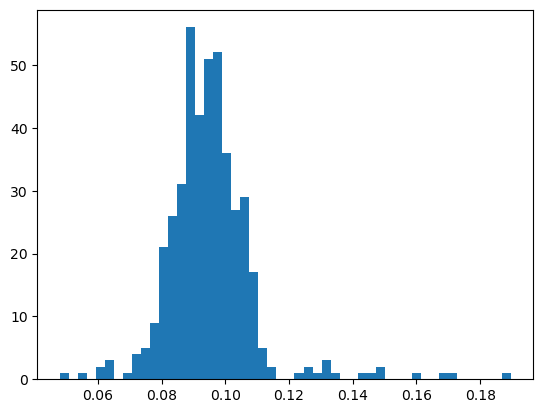

In [61]:
reconstructions_a = model.predict(anomaly_test_data)
train_loss_a = tf.keras.losses.mae(reconstructions_a, anomaly_test_data)

plt.hist(train_loss_a, bins=50)

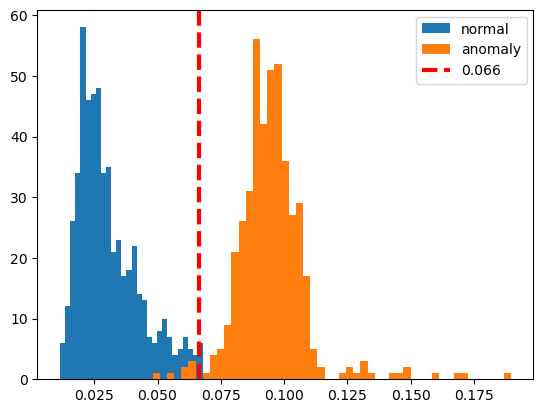

In [62]:
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_a, bins=50, label='anomaly')
plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

In [63]:
tf.math.less(train_loss, threshold)

<tf.Tensor: shape=(563,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [64]:
preds = tf.math.less(train_loss, threshold)
n = tf.math.count_nonzero(preds)
normal_percentage = n.numpy()/len(preds)

In [66]:
preds_a = tf.math.greater(train_loss_a, threshold)
a = tf.math.count_nonzero(preds_a)
anomaly_percentage = a.numpy()/len(preds_a)

In [67]:
print(f"Anomaly data accuracy: {anomaly_percentage}")
print(f"Normal data accuracy: {normal_percentage}")

Anomaly data accuracy: 0.9839816933638444
Normal data accuracy: 0.9538188277087034
